# **SMS SPAM CLASSIFIER **

In [1]:
import string

import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import  PorterStemmer

from wordcloud import WordCloud

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import pickle

In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

# df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],inplace=True)



In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
#Renaming columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# To convert values into boolean
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
#Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# Check for duplicates
df.duplicated().sum()

np.int64(403)

In [14]:
# Remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5169, 2)

# EDA

In [16]:
df['target'].value_counts()
# Ham is more than spam

target
0    4516
1     653
Name: count, dtype: int64

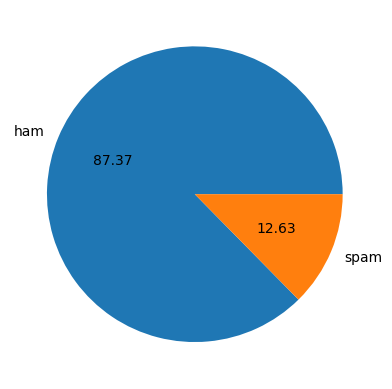

In [17]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

# Conclusion - Data in imbalance

In [18]:
# Length of each message
df['num_characters'] = df['text'].apply(len)
df.head()

/tmp/ipykernel_17/521691868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# No. of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

/tmp/ipykernel_17/2799230380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
# No. of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

/tmp/ipykernel_17/671327397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [22]:
# describe for ham
df[df['target']==0][['target','num_characters','num_words','num_sentences']].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [23]:
# describe for apam
df[df['target']==1][['target','num_characters','num_words','num_sentences']].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000



> From above analysis we can clearly see that avg words of spam are 27 and ham are 17, characters also 137 and 27 respectively.Which means spam messages are lengthy


<Axes: xlabel='num_characters', ylabel='Count'>

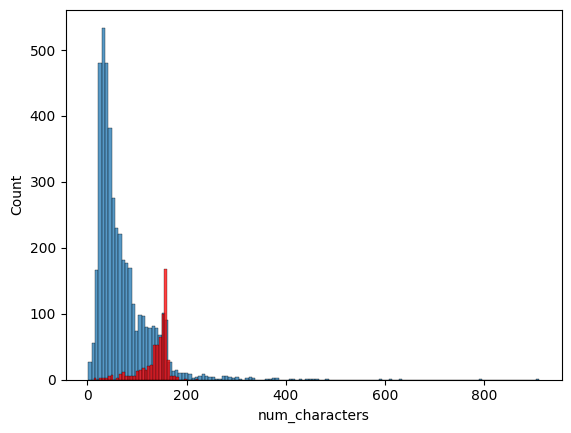

In [24]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

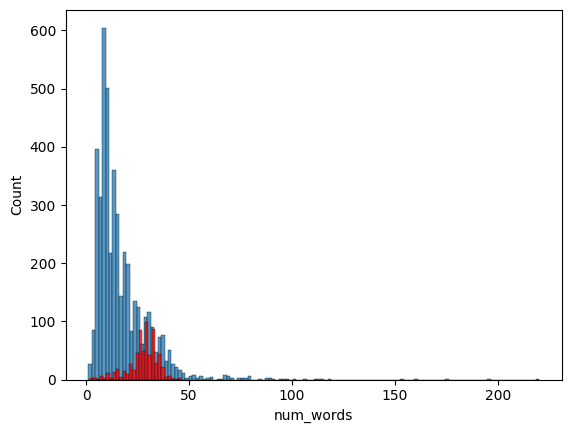

In [25]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

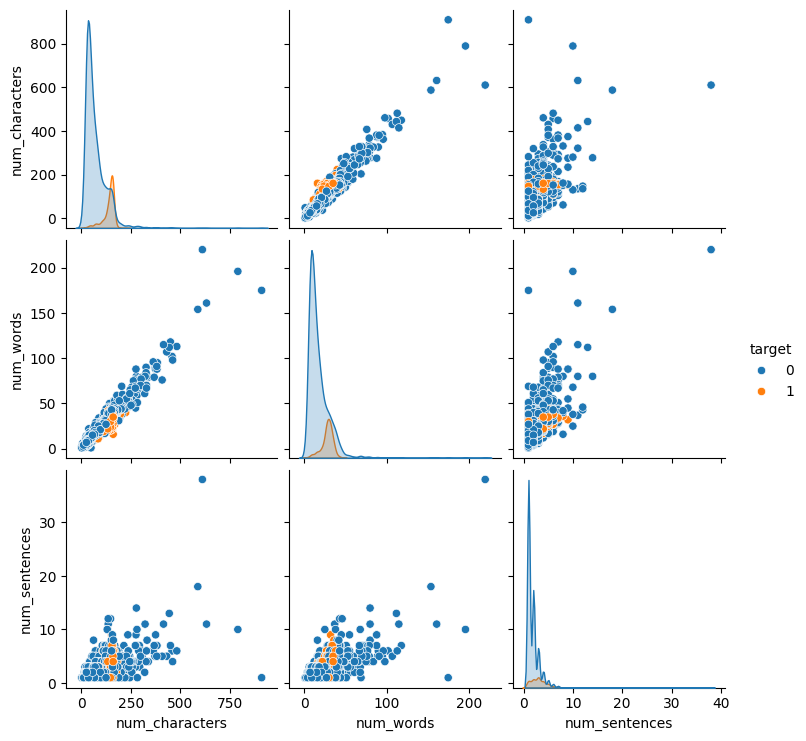

In [26]:
sns.pairplot(df,hue='target')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int64 
 1   text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


<Axes: >

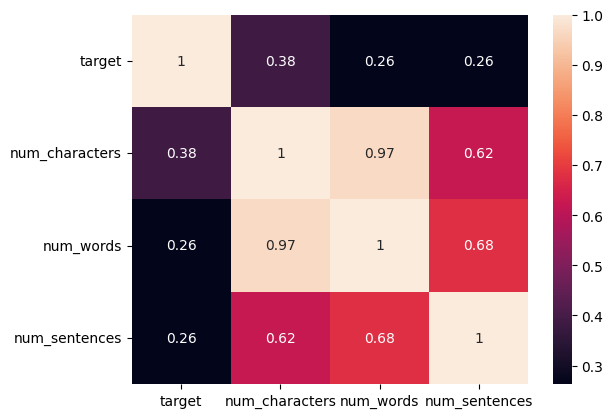

In [28]:
# Can only apply on nnumber fields
num_df = df.select_dtypes(include="number")

num_df.corr()

sns.heatmap(num_df.corr(),annot=True)

> Variation of num_characters with target is highest so we can use to create a model

# Data Preprocessing

In [29]:
ps = PorterStemmer()
ps.stem("Loving")

'love'

In [30]:
def transform_text(text):
    # Convert in lowercase
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    # Use set below to avoid nested loops
    stop_words = set(stopwords.words("english"))

    y = []
    for t in tokens:
        # if special chars then don't append
        # if t.isalnum() and t not in stopwords.words('english') and t not in string.punctuation:
        # if t.isalnum() and t not in stopwords.words('english'): # no need of string.punctuation
        if t.isalnum() and t not in stop_words: # no need to stopwords list
            y.append(ps.stem(t))
        
    return " ".join(y)


In [31]:
text = "How was your yesterday's meeting? was that good?"
transform_text(text)

'yesterday meet good'

In [32]:
text = "How was your meeting bro?"
transform_text(text)

'meet bro'

In [33]:
# remove stop words
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [34]:
# punctuation marks
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
df['transformed_text'] = df['text'].apply((transform_text))

/tmp/ipykernel_17/3272843635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply((transform_text))


In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
# To hhighlight the important words
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

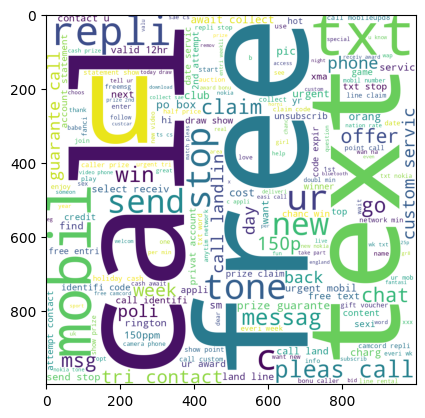

In [38]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

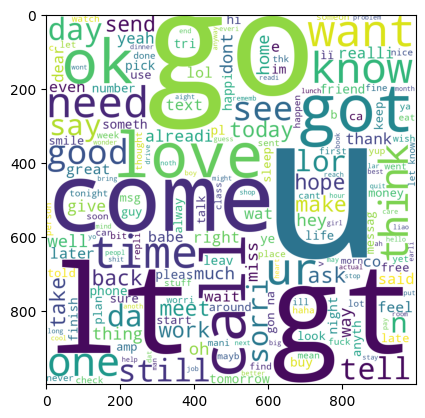

In [39]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [40]:
# All data in one list
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

In [41]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

**Top spam words chart**

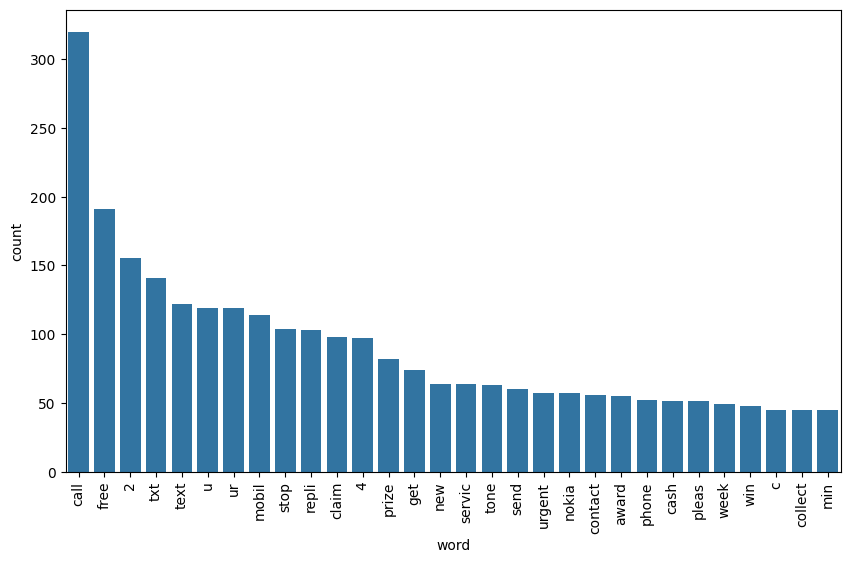

In [42]:
top30Spam = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=["word", "count"]
)

plt.figure(figsize=(10,6))
sns.barplot(data=top30Spam, x="word", y="count")
plt.xticks(rotation=90)
plt.show()

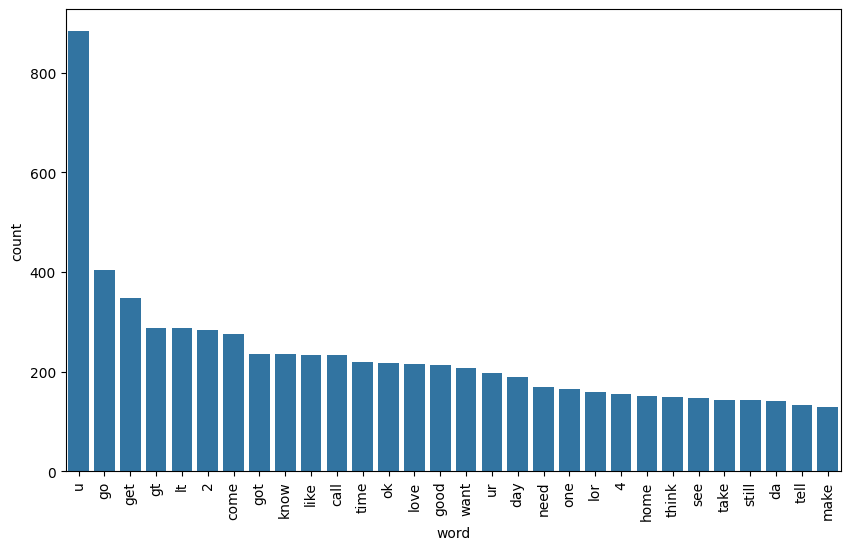

In [43]:
top30Ham = pd.DataFrame(
    Counter(ham_corpus).most_common(30),
    columns=["word", "count"]
)

plt.figure(figsize=(10,6))
sns.barplot(data=top30Ham, x="word", y="count")
plt.xticks(rotation=90)
plt.show()

# Building Model

# 1.Naive Bayes

In [44]:
# cv = CountVectorizer()
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
# Features
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [45]:
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [46]:
# Target
y = df['target'].values

In [47]:
X.shape

(5169, 3000)

In [48]:
y.shape

(5169,)

In [49]:
# Random split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# stratified split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

> precision_score of BernoulliNB was 97 with random split and 98 with stratified split

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
# Create Gaussian model
gnb.fit(X_train,y_train)

GaussianNB()

In [52]:
y_pred1 = gnb.predict(X_test)
print(f"accuracy_score -- {accuracy_score(y_test,y_pred1)}")
print(f"confusion_matrix--{confusion_matrix(y_test,y_pred1)}")
print(f"precision_score -- {precision_score(y_test,y_pred1)}")

accuracy_score -- 0.8781431334622823
confusion_matrix--[[785 118]
 [  8 123]]
precision_score -- 0.5103734439834025


In [53]:
# Create Multinomial model
mnb.fit(X_train,y_train)

MultinomialNB()

In [54]:
y_pred2 = mnb.predict(X_test)
print(f"accuracy_score -- {accuracy_score(y_test,y_pred2)}")
print(f"confusion_matrix--{confusion_matrix(y_test,y_pred2)}")
print(f"precision_score -- {precision_score(y_test,y_pred2)}")

accuracy_score -- 0.988394584139265
confusion_matrix--[[897   6]
 [  6 125]]
precision_score -- 0.9541984732824428


> mnb precision was 87 with countervectorizer but 1 with tfidf so we will keep tfidf mnb

precision_score -- 1.0

> mnb accuracy was 96 with tfidf all features but now 98 with tfidf 3k features so we will keep tfidf max features 3k

accuracy_score -- 0.9825918762088974

> mnb accuracy improved after scaling

accuracy_score -- 0.988394584139265


In [55]:
# Create Burnauli model
bnb.fit(X_train,y_train)

BernoulliNB()

In [56]:
y_pred3 = bnb.predict(X_test)
print(f"accuracy_score -- {accuracy_score(y_test,y_pred3)}")
print(f"confusion_matrix--{confusion_matrix(y_test,y_pred3)}")
print(f"precision_score -- {precision_score(y_test,y_pred3)}")

accuracy_score -- 0.9874274661508704
confusion_matrix--[[900   3]
 [ 10 121]]
precision_score -- 0.9758064516129032


In [57]:

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))